# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [ ]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.


### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1.pkl

In [92]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df = pd.read_pickle('data1.pkl')

In [93]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df.head()

,Date,vehicle_c,receipt_c,boarding_c,waiting_time,fare,distance,temp_max,temp_min,rain(mm),...,humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,wt_ma7,board_ratio,daily_vehicle
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,...,28.0,9.07,Thursday,1,Winter,2015,1.0,23.200,0.903226,4.802817
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,...,37.0,8.66,Friday,1,Winter,2015,0.0,20.200,0.898987,7.519048
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,...,58.0,5.32,Saturday,1,Winter,2015,0.0,22.200,0.918689,7.885167
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,...,52.0,6.48,Sunday,1,Winter,2015,0.0,22.775,0.927096,8.397959
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,...,29.0,10.47,Monday,1,Winter,2015,0.0,23.460,0.877647,10.095012


## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [4]:
# 숫자형 변수 분석
def eda_1_n(data, var, hue_var = ''):
    display(data[[var]].describe().T)

    if hue_var == '' :
        plt.figure(figsize = (15,10))
        plt.subplot(2,1,1)
        sns.histplot(data[var], kde = True, bins = 50)
        plt.grid()

        plt.subplot(2,1,2)
        sns.boxplot(x = data[var])
        plt.grid()
        plt.show()
    else :
        plt.figure(figsize = (15,5))
        plt.subplot(1,2,1)
        sns.kdeplot(x= var, data = data, hue = hue_var)
        plt.grid()

        plt.subplot(1,2,2)
        sns.boxplot(x = hue_var, y = var, data = data)
        plt.grid()

In [5]:
# 범주형 변수 분석
def eda_1_c(data, var, hue_var = ''):

    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    result = pd.DataFrame({'Count':cnt, 'Prop':prop})
    display(result)

    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 접수건

,count,mean,std,min,25%,50%,75%,max
receipt_c,2923.0,3924.83818,1510.056733,527.0,2161.0,4720.0,5110.0,6182.0


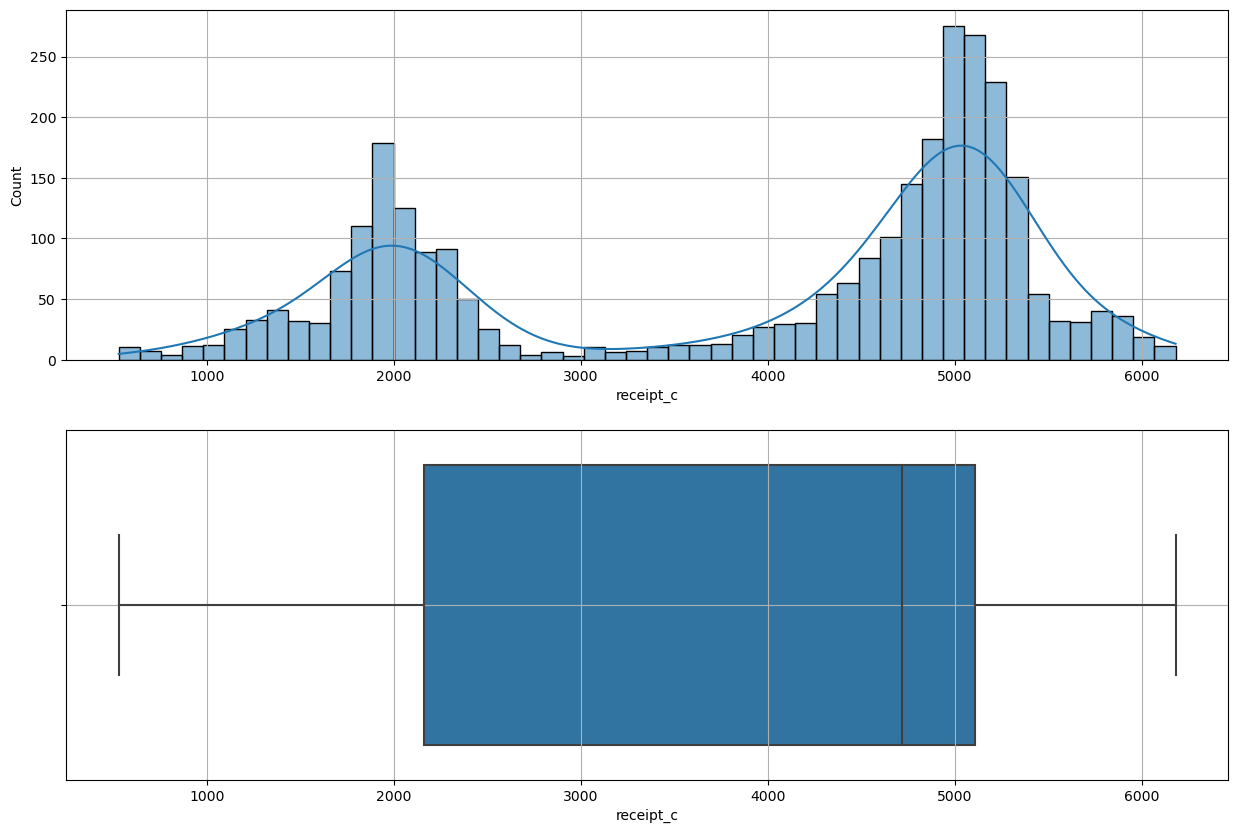

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(df, 'receipt_c')

#### 2) 평균대기시간

,count,mean,std,min,25%,50%,75%,max
waiting_time,2923.0,40.300171,14.099285,17.2,29.6,38.2,48.6,96.1


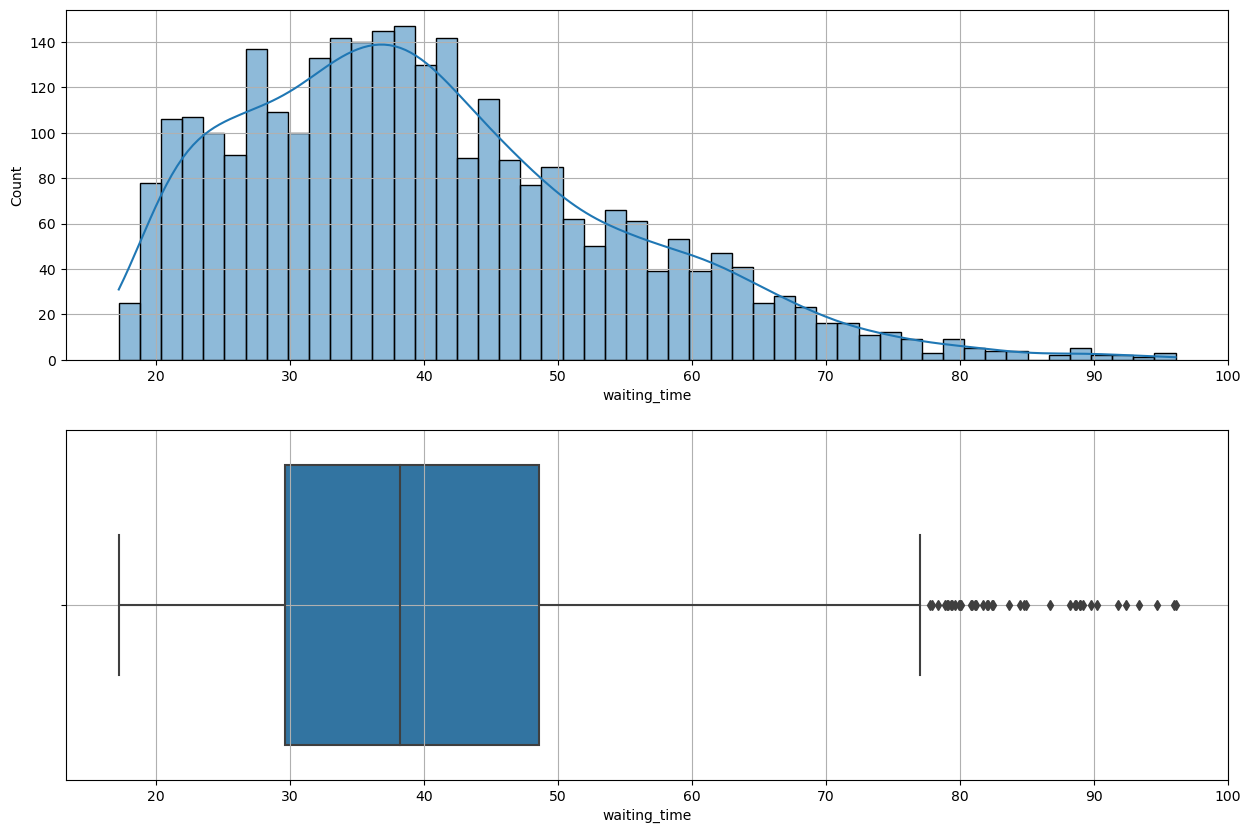

In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

eda_1_n(df, 'waiting_time')

In [91]:
# data_o_1[data_o_1['waiting_time'] > 48]
df[df['waiting_time'] > 48]

,Date,vehicle_c,receipt_c,boarding_c,waiting_time,fare,distance,temp_max,temp_min,rain(mm),...,humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,wt_ma7,board_ratio,cat_wt
86,2015-03-28,233,2129,1759,49.9,2460,11282,16.0,7.1,0.0,...,31.0,12.83,Saturday,3,Spring,2015,0.0,31.257143,0.826209,2
100,2015-04-11,251,2273,1805,52.5,2489,11571,20.2,9.1,0.0,...,18.0,12.60,Saturday,4,Spring,2015,0.0,34.114286,0.794105,2
107,2015-04-18,234,2222,1707,62.8,2480,11319,17.2,11.6,11.5,...,24.0,5.15,Saturday,4,Spring,2015,0.0,38.828571,0.768227,2
114,2015-04-25,233,2288,1789,57.1,2463,11395,23.9,9.9,0.0,...,18.0,20.92,Saturday,4,Spring,2015,0.0,37.471429,0.781906,2
128,2015-05-09,259,2230,1839,50.0,2451,11190,25.6,13.7,0.0,...,18.0,23.43,Saturday,5,Spring,2015,0.0,34.400000,0.824664,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,2022-12-19,625,5772,4784,50.6,2161,7881,2.4,-9.3,0.0,...,42.0,10.10,Monday,12,Winter,2022,0.0,41.300000,0.828829,2
2911,2022-12-20,665,6020,4992,49.4,2182,8108,2.6,-1.9,3.6,...,59.0,2.48,Tuesday,12,Winter,2022,0.0,42.414286,0.829236,2
2913,2022-12-22,625,5899,4716,56.4,2188,8051,-9.2,-13.7,0.0,...,53.0,10.76,Thursday,12,Winter,2022,0.0,45.242857,0.799458,2
2914,2022-12-23,607,5570,4361,51.7,2159,8003,-2.1,-13.5,0.0,...,40.0,10.92,Friday,12,Winter,2022,0.0,46.257143,0.782944,2


#### 3) 평균운임

,count,mean,std,min,25%,50%,75%,max
fare,2923.0,2304.362299,107.351769,2131.0,2228.0,2257.0,2401.0,2733.0


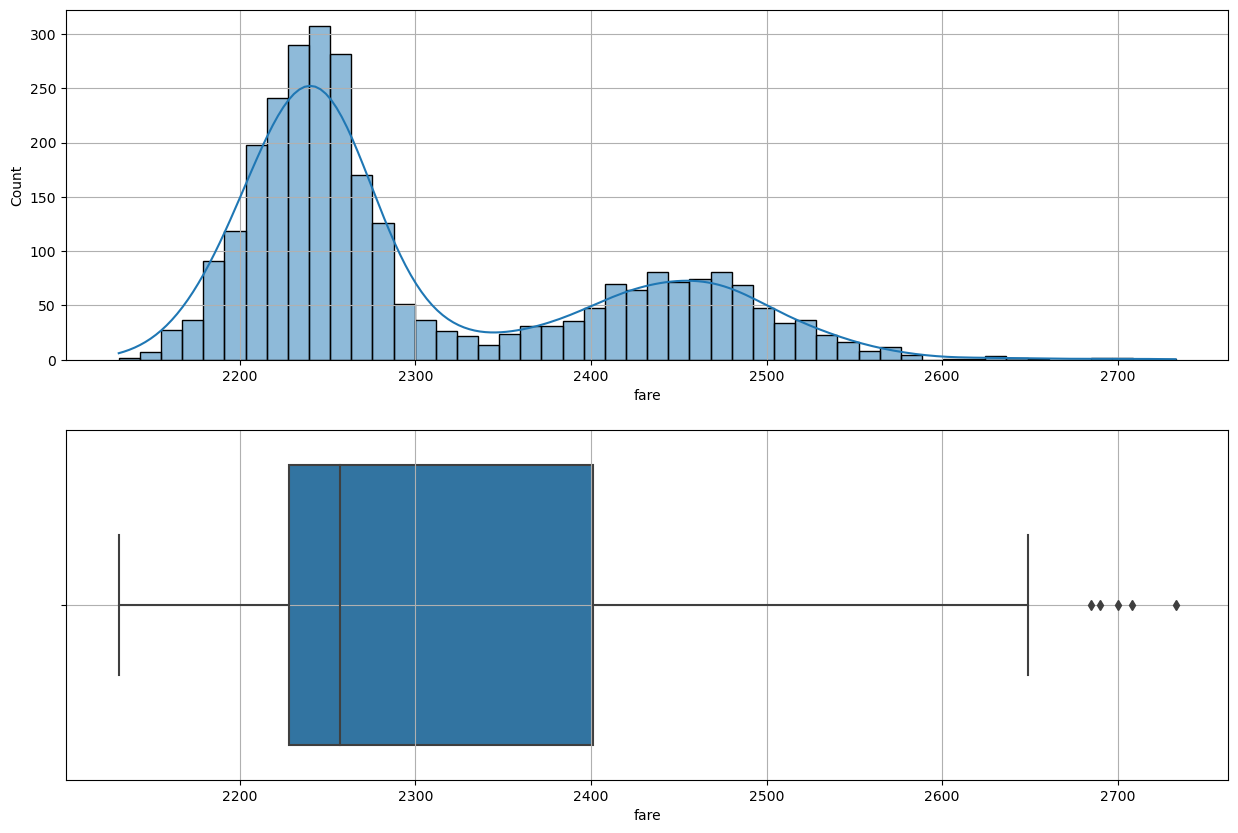

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
eda_1_n(df, 'fare')

#### 4) 평균거리

,count,mean,std,min,25%,50%,75%,max
distance,2923.0,9254.353062,1020.066902,7672.0,8521.0,8822.0,10154.0,14136.0


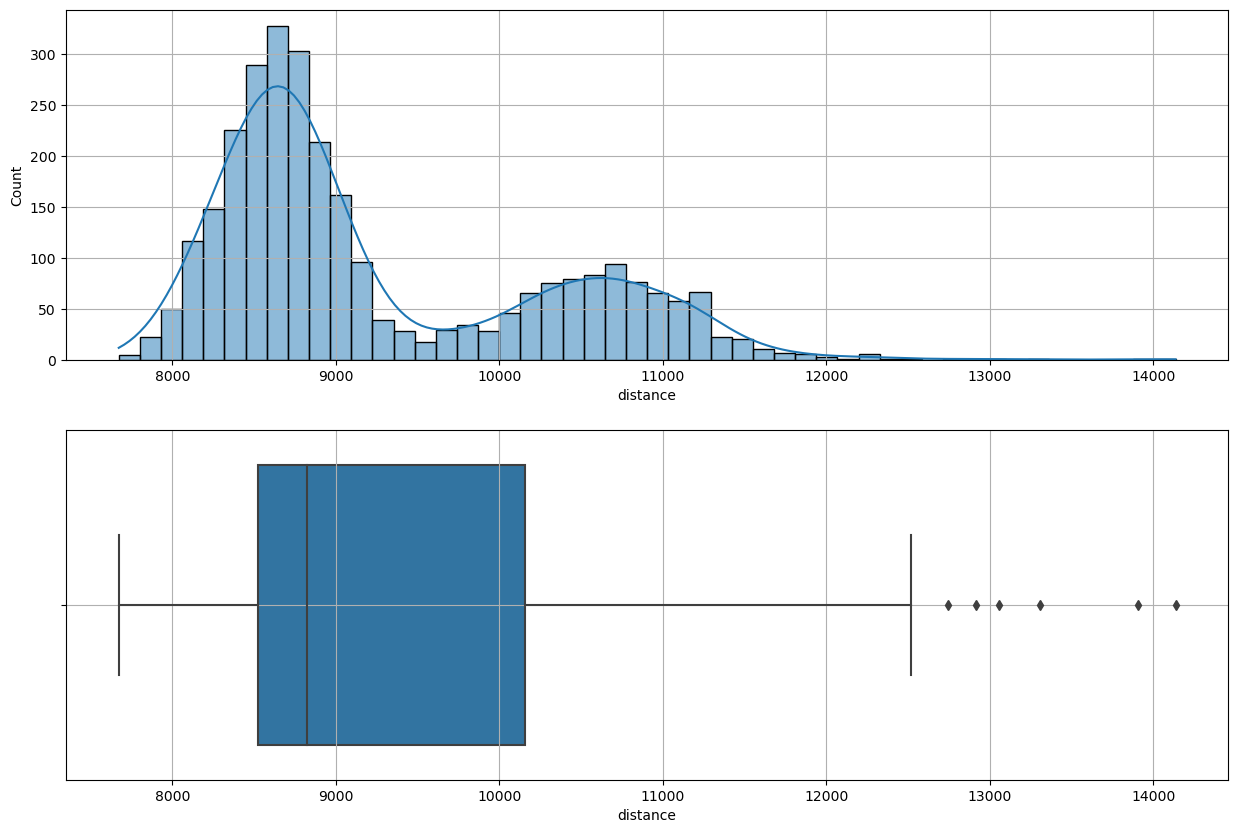

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
eda_1_n(df, 'distance')

#### 5) 탑승률

,count,mean,std,min,25%,50%,75%,max
board_ratio,2923.0,0.841565,0.052167,0.596996,0.805964,0.845571,0.877718,0.968844


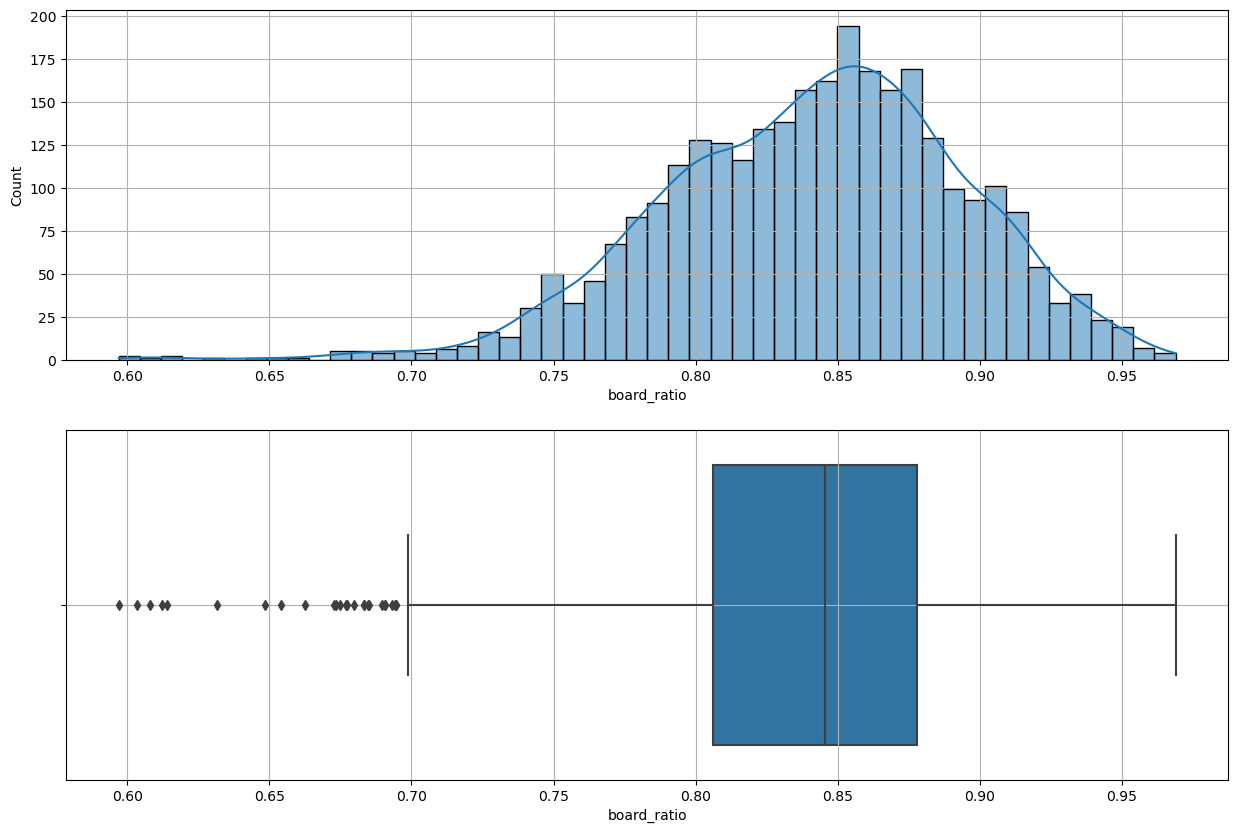

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
eda_1_n(df, 'board_ratio')

#### 6) 최고기온(°C)

,count,mean,std,min,25%,50%,75%,max
temp_max,2923.0,18.07181,10.711662,-11.2,9.0,19.7,27.4,39.4


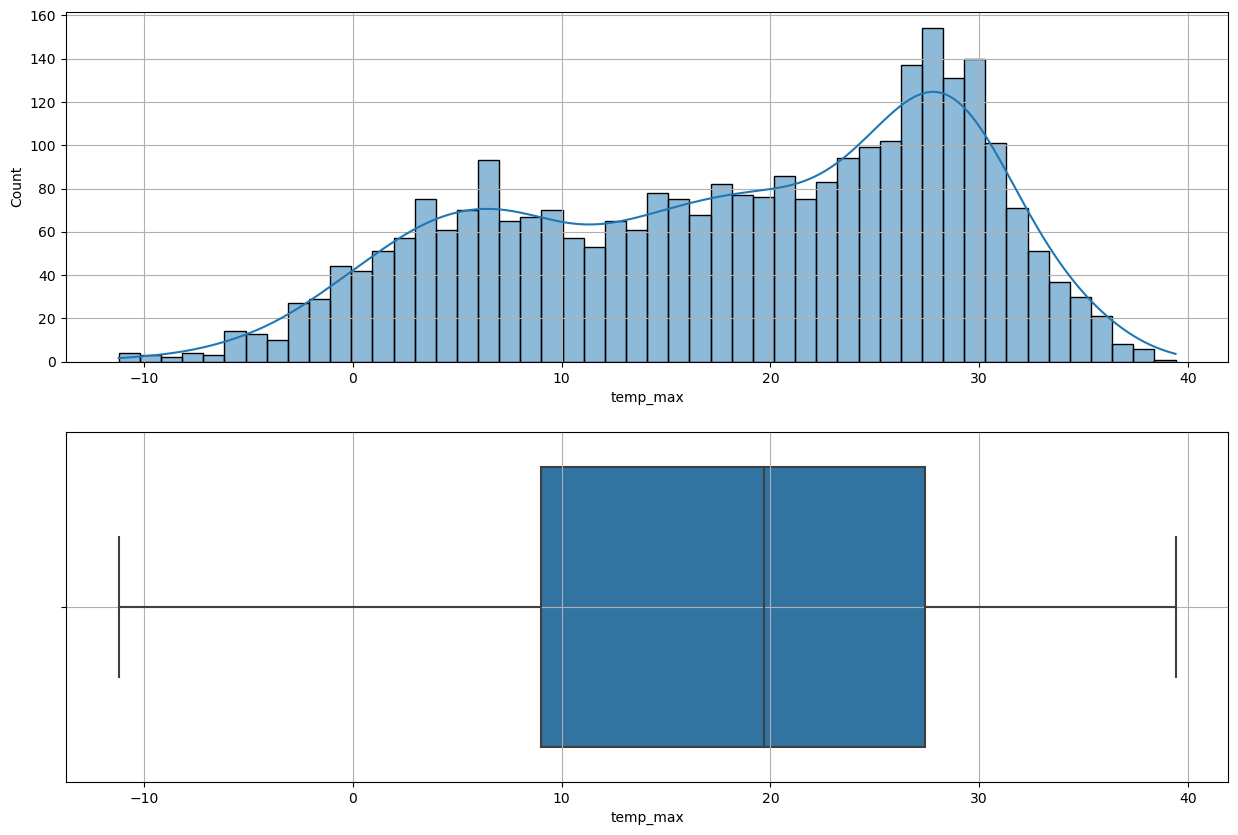

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
eda_1_n(df, 'temp_max')

#### 7) 일강수량(mm)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2923.0,3.354465,12.593801,0.0,0.0,0.0,0.3,178.9


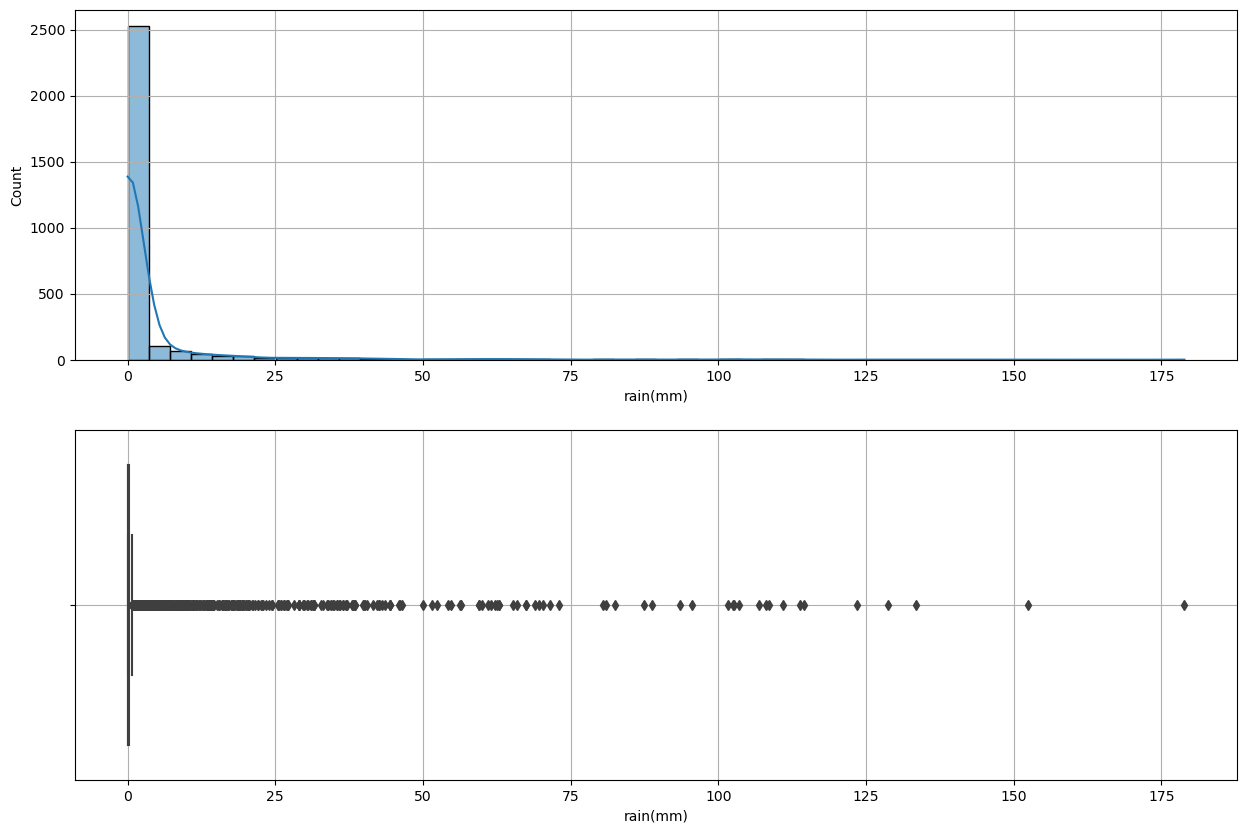

In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
eda_1_n(df, 'rain(mm)')

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 공휴일 유무

,Count,Prop
holiday,,
0.0,2803,0.958946
1.0,120,0.041054


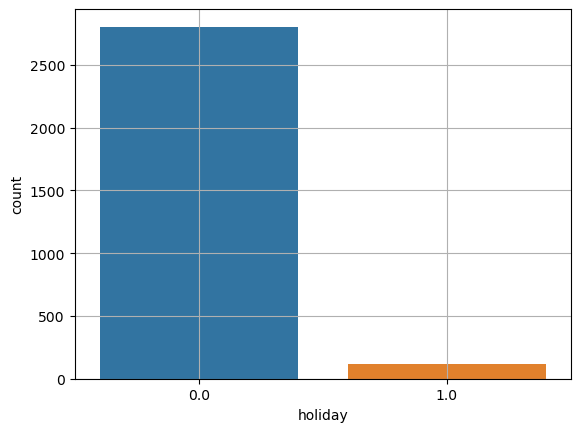

In [21]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
eda_1_c(df, 'holiday')

-----

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

In [78]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
target = 'waiting_time'

#### 1) 전체 상관계수 시각화

In [22]:
# 전체 상관관계를 한눈에 보여주기 함수
def eda_2_corr(data, num_vars):

    temp = data.loc[:, num_vars]
    corr = temp.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    display(mask * corr)

    sns.set(style='white')
    plt.figure(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot = True)
    plt.show()

,vehicle_c,receipt_c,boarding_c,waiting_time,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),wt_ma7,board_ratio,daily_vehicle
vehicle_c,1.0,0.885944,0.904711,0.036265,-0.844599,-0.857587,0.109173,0.110021,0.002735,0.049465,0.087472,0.077216,-0.065857,-0.028321,0.255040
receipt_c,0.0,1.000000,0.988760,0.292297,-0.850360,-0.847801,0.058736,0.054651,-0.012693,-0.013433,-0.001201,0.025190,0.188464,-0.251071,0.653629
boarding_c,0.0,0.000000,1.000000,0.184828,-0.867966,-0.858673,0.065068,0.058940,-0.015634,-0.007664,0.005620,0.041215,0.081668,-0.117402,0.602189
waiting_time,0.0,0.000000,0.000000,1.000000,0.019276,-0.014135,0.040932,0.034470,-0.005593,-0.040226,-0.087102,-0.043734,0.842387,-0.769900,0.581641
fare,-0.0,-0.000000,-0.000000,0.000000,1.000000,0.977614,0.083800,0.070431,0.011255,0.019778,-0.035365,0.008753,0.121106,0.007463,-0.417341
distance,-0.0,-0.000000,-0.000000,-0.000000,0.000000,1.000000,0.087917,0.073474,0.004731,0.020487,-0.039947,-0.000774,0.076397,0.047514,-0.388496
temp_max,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.961498,0.116941,0.306808,0.283167,0.475927,0.041374,0.023850,-0.088759
temp_min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.201874,0.401289,0.461034,0.309049,0.032624,0.013411,-0.094972
rain(mm),0.0,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.335472,0.446233,-0.285037,-0.013401,-0.004492,-0.043191
humidity_max(%),0.0,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.637969,-0.202872,-0.059836,0.052873,-0.124355


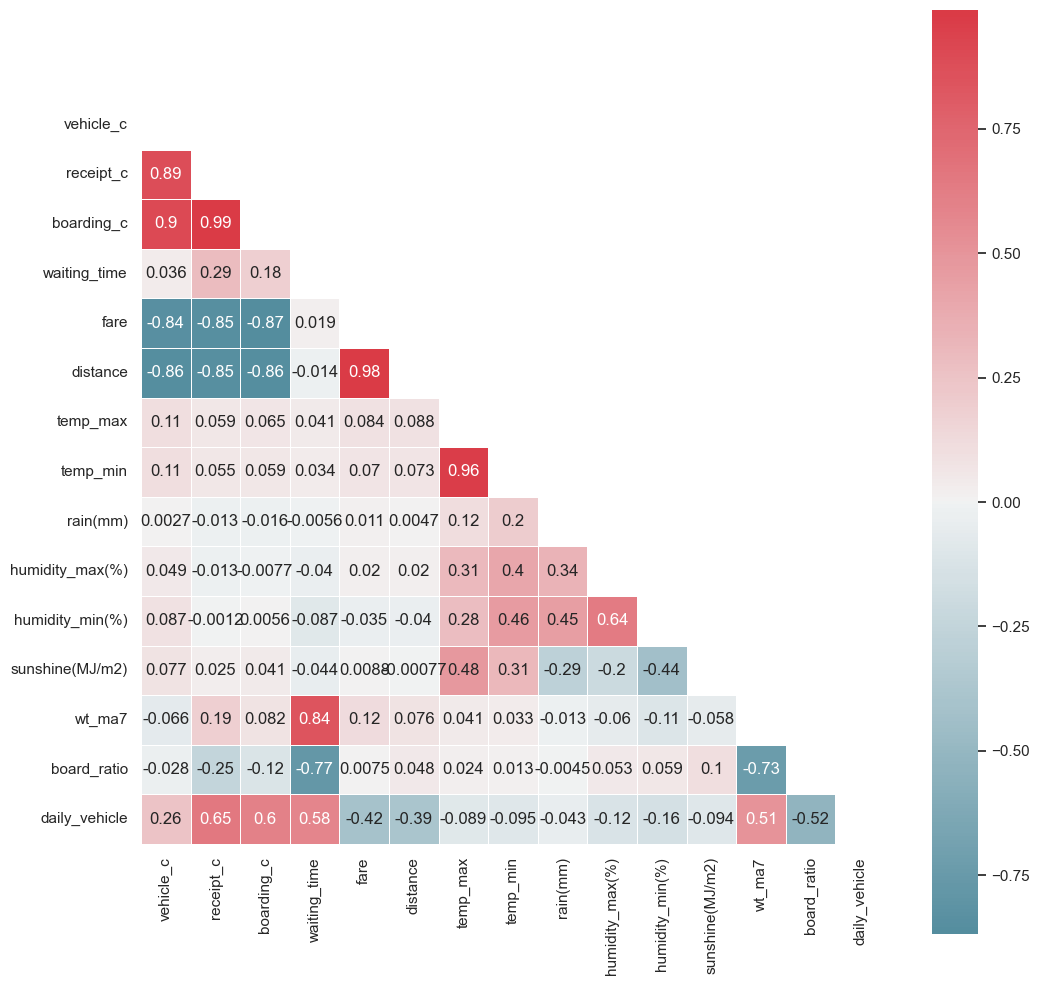

In [96]:
num_vars = ['vehicle_c', 'receipt_c', 'boarding_c', 'waiting_time', 'fare',
       'distance', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'wt_ma7', 'board_ratio', 'daily_vehicle']

eda_2_corr(df, num_vars)

#### 2) 산점도

In [28]:
def eda_2_nn(data, target, var, hue = ''):

    plt.figure(figsize = (8,8))
    if hue == '' :
        sns.scatterplot(x = var, y = target, data = data)
        plt.grid()

    if hue != '' :
        sns.scatterplot(x = var, y = target, data = data, hue = hue)
        plt.grid()

    plt.show()

* ride_rate

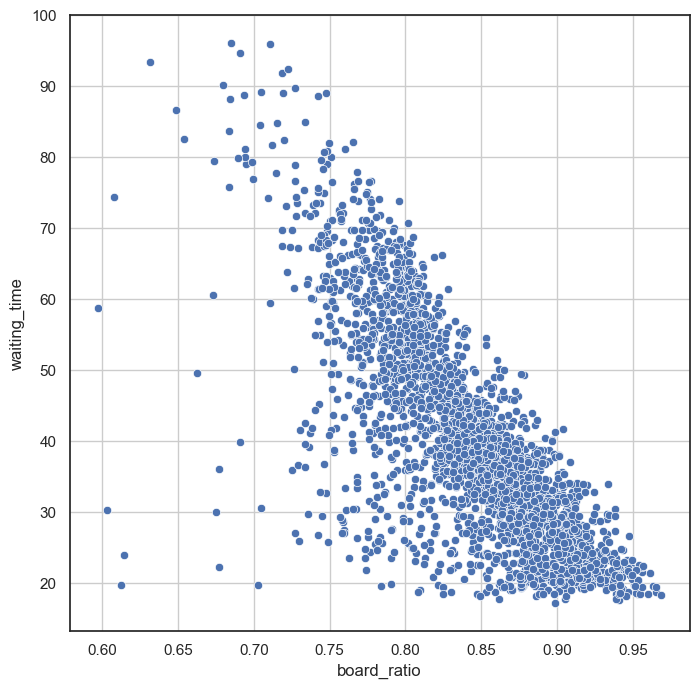

In [33]:
eda_2_nn(df, target, 'board_ratio')

* fare

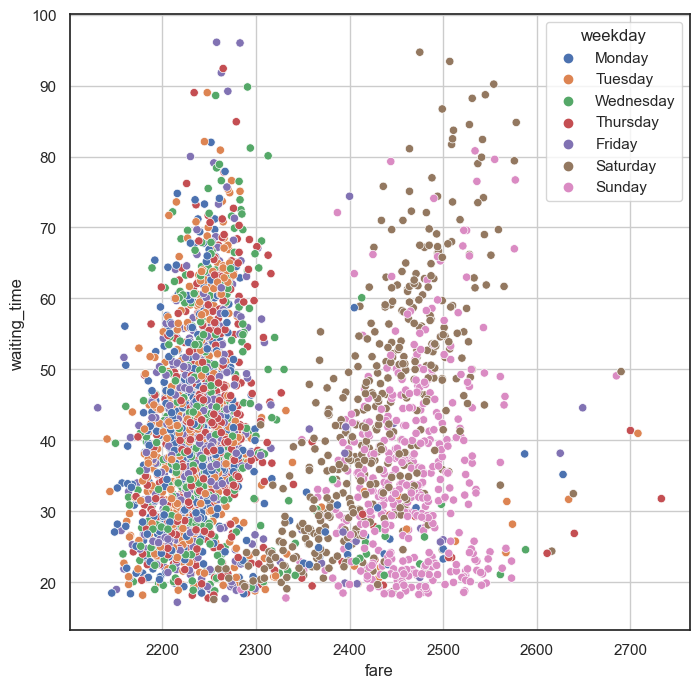

In [36]:
eda_2_nn(df, target, 'fare', 'weekday')

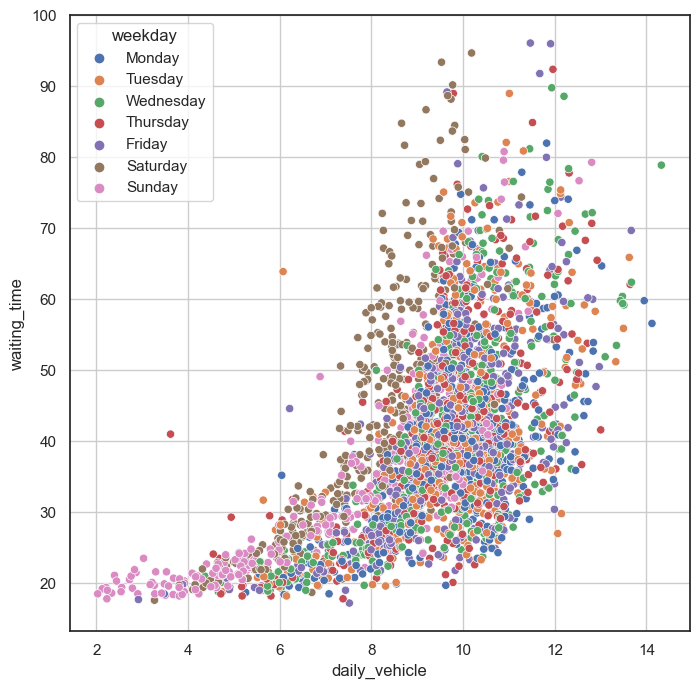

In [95]:
eda_2_nn(df, target, 'daily_vehicle', 'weekday')

In [94]:
df

,Date,vehicle_c,receipt_c,boarding_c,waiting_time,fare,distance,temp_max,temp_min,rain(mm),...,humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,wt_ma7,board_ratio,daily_vehicle
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,...,28.0,9.07,Thursday,1,Winter,2015,1.0,23.200000,0.903226,4.802817
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,...,37.0,8.66,Friday,1,Winter,2015,0.0,20.200000,0.898987,7.519048
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,...,58.0,5.32,Saturday,1,Winter,2015,0.0,22.200000,0.918689,7.885167
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,...,52.0,6.48,Sunday,1,Winter,2015,0.0,22.775000,0.927096,8.397959
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,...,29.0,10.47,Monday,1,Winter,2015,0.0,23.460000,0.877647,10.095012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2022-12-27,669,5635,4654,44.4,2198,8178,-0.3,-5.4,0.1,...,40.0,10.86,Tuesday,12,Winter,2022,0.0,42.771429,0.825909,8.423019
2919,2022-12-28,607,5654,4648,44.8,2161,7882,1.7,-7.8,0.0,...,34.0,10.88,Wednesday,12,Winter,2022,0.0,43.514286,0.822073,9.314662
2920,2022-12-29,581,5250,4247,52.5,2229,8433,2.1,-4.0,0.0,...,38.0,10.84,Thursday,12,Winter,2022,0.0,42.957143,0.808952,9.036145
2921,2022-12-30,600,5293,4200,38.3,2183,8155,-4.4,-4.4,0.0,...,66.0,0.00,Friday,12,Winter,2022,0.0,41.042857,0.793501,8.821667


### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

* 휴일 여부

In [37]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

,count,mean,std,min,25%,50%,75%,max
waiting_time,2923.0,40.300171,14.099285,17.2,29.6,38.2,48.6,96.1


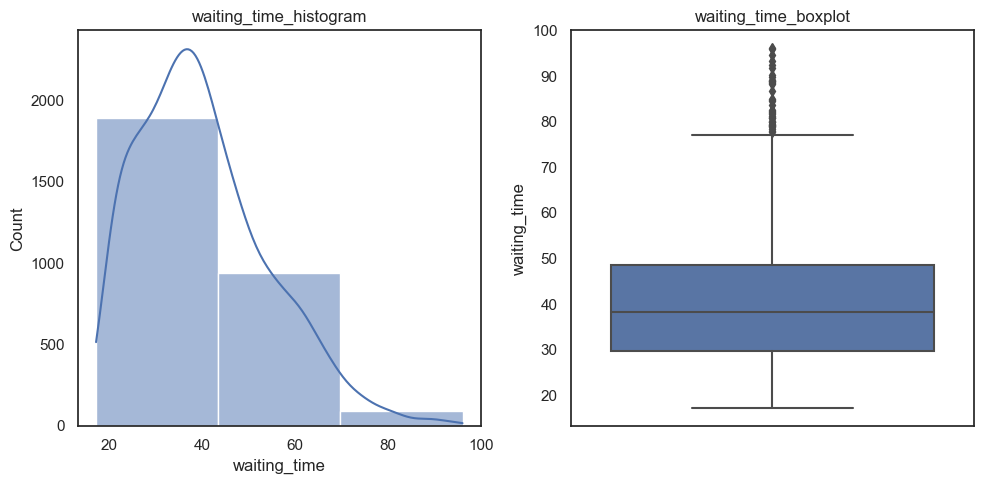

In [53]:
display(df[['waiting_time']].describe().T)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['waiting_time'], bins=3, kde=True)  # 히스토그램 그리기
plt.title('waiting_time_histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['waiting_time'])
plt.title('waiting_time_boxplot')

plt.tight_layout()
plt.show()

In [51]:
# pd.cut(df['waiting_time'], bins=, labels)
df['cat_wt'] = pd.qcut(df['waiting_time'], q=3, labels=[0, 1, 2])

In [52]:
# t-test
h0 = df.loc[df['holiday']==0, 'cat_wt']
h1 = df.loc[df['holiday']==1, 'cat_wt']
spst.ttest_ind(h0, h1)

TtestResult(statistic=10.25967381309206, pvalue=2.7511619463998118e-24, df=2921.0)

In [73]:
# t-test
h0 = df.loc[df['holiday']==0, 'waiting_time']
h1 = df.loc[df['holiday']==1, 'waiting_time']
spst.ttest_ind(h0, h1)

TtestResult(statistic=9.34258937743362, pvalue=1.8079187961897193e-20, df=2921.0)

* 요일

In [56]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [76]:
# # anova
temp = df.loc[df['weekday'].notnull()]

w0 = temp.loc[temp['weekday']=='Monday', 'cat_wt']
w1 = temp.loc[temp['weekday']=='Tuesday', 'cat_wt']
w2 = temp.loc[temp['weekday']=='Wednesday', 'cat_wt']
w3 = temp.loc[temp['weekday']=='Thursday', 'cat_wt']
w4 = temp.loc[temp['weekday']=='Friday', 'cat_wt']
w5 = temp.loc[temp['weekday']=='Saturday', 'cat_wt']
w6 = temp.loc[temp['weekday']=='Sunday', 'cat_wt']

spst.f_oneway(w0,w1,w2,w3,w4,w5,w6)

F_onewayResult(statistic=13.20809212539314, pvalue=8.231423753610695e-15)

In [79]:
# # anova
temp = df.loc[df['weekday'].notnull()]

w0 = temp.loc[temp['weekday']=='Monday', target]
w1 = temp.loc[temp['weekday']=='Tuesday', target]
w2 = temp.loc[temp['weekday']=='Wednesday', target]
w3 = temp.loc[temp['weekday']=='Thursday', target]
w4 = temp.loc[temp['weekday']=='Friday', target]
w5 = temp.loc[temp['weekday']=='Saturday', target]
w6 = temp.loc[temp['weekday']=='Sunday', target]

spst.f_oneway(w0,w1,w2,w3,w4,w5,w6)

F_onewayResult(statistic=15.66669048966133, pvalue=8.814291693785567e-18)

* 계절

In [68]:
df['cat_wt'] = df['cat_wt'].astype('int64')

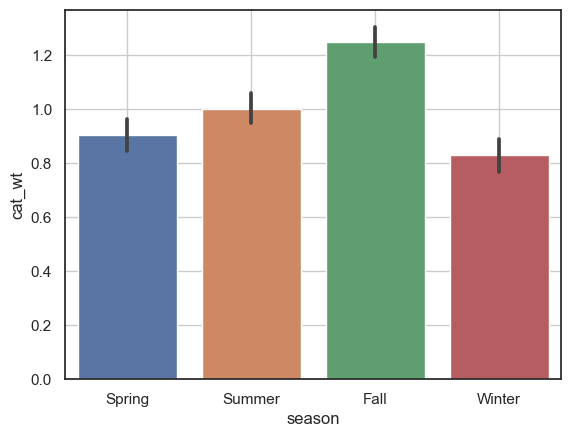

In [69]:
sns.barplot(x = 'season', y = 'cat_wt', data = df)
plt.grid()
plt.show()

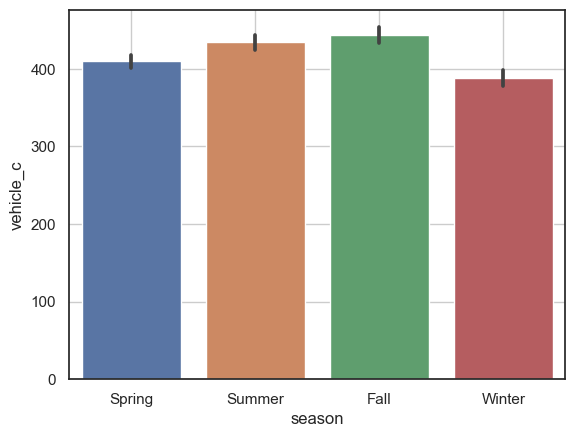

In [104]:
sns.barplot(x = 'month', y = 'vehicle_c', data = df)
plt.grid()
plt.show()

In [98]:
df

,Date,vehicle_c,receipt_c,boarding_c,waiting_time,fare,distance,temp_max,temp_min,rain(mm),...,humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,wt_ma7,board_ratio,daily_vehicle
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,...,28.0,9.07,Thursday,1,Winter,2015,1.0,23.200000,0.903226,4.802817
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,...,37.0,8.66,Friday,1,Winter,2015,0.0,20.200000,0.898987,7.519048
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,...,58.0,5.32,Saturday,1,Winter,2015,0.0,22.200000,0.918689,7.885167
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,...,52.0,6.48,Sunday,1,Winter,2015,0.0,22.775000,0.927096,8.397959
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,...,29.0,10.47,Monday,1,Winter,2015,0.0,23.460000,0.877647,10.095012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2022-12-27,669,5635,4654,44.4,2198,8178,-0.3,-5.4,0.1,...,40.0,10.86,Tuesday,12,Winter,2022,0.0,42.771429,0.825909,8.423019
2919,2022-12-28,607,5654,4648,44.8,2161,7882,1.7,-7.8,0.0,...,34.0,10.88,Wednesday,12,Winter,2022,0.0,43.514286,0.822073,9.314662
2920,2022-12-29,581,5250,4247,52.5,2229,8433,2.1,-4.0,0.0,...,38.0,10.84,Thursday,12,Winter,2022,0.0,42.957143,0.808952,9.036145
2921,2022-12-30,600,5293,4200,38.3,2183,8155,-4.4,-4.4,0.0,...,66.0,0.00,Friday,12,Winter,2022,0.0,41.042857,0.793501,8.821667


In [ ]:
sns.barplot(x = 'season', y = target, data = df)
plt.grid()
plt.show()

In [72]:
# anova
temp = df.loc[df['season'].notnull()]

s0 = temp.loc[temp['season']=='Spring', 'cat_wt']
s1 = temp.loc[temp['season']=='Summer', 'cat_wt']
s2 = temp.loc[temp['season']=='Fall', 'caㅇt_wt']
s3 = temp.loc[temp['season']=='Winter', 'cat_wt']

spst.f_oneway(s0,s1,s2,s3)

F_onewayResult(statistic=36.95351825071051, pvalue=1.9634777050451126e-23)

In [81]:
# anova
temp = df.loc[df['season'].notnull()]

s0 = temp.loc[temp['season']=='Spring', target]
s1 = temp.loc[temp['season']=='Summer', target]
s2 = temp.loc[temp['season']=='Fall', target]
s3 = temp.loc[temp['season']=='Winter', target]

spst.f_oneway(s0,s1,s2,s3)

F_onewayResult(statistic=32.43282248735729, pvalue=1.2875953782618546e-20)

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 0.7이상 
'''
# 0.7 이상
    - wt_ma7, board_ratio
    - 요일, 휴일, 계절은 P-value < 0.05이하로 관련이 있어보임
'''

* 중간(약한) 관계의 변수

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
'''
 # 0.2 <= r < 0.7 
    - receipt_c, boarding_c
'''


* (거의) 관계가 없는 변수

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
'''
 # 0.2 이하
     - 기상관련 변수들은 상관계수 값이 작음
'''

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [84]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df.to_pickle('data2.pkl')